In [1]:
import pandas as pd

In [73]:
dataset = pd.read_csv('titanic_train.csv')

In [74]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [75]:
dataset.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [76]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [77]:
import seaborn as sns
sns.set()

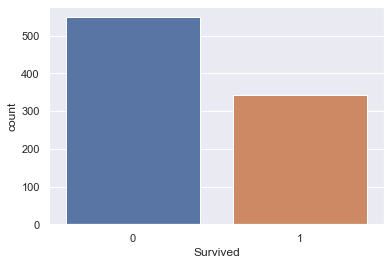

In [78]:
sns.countplot(x = dataset["Survived"] )

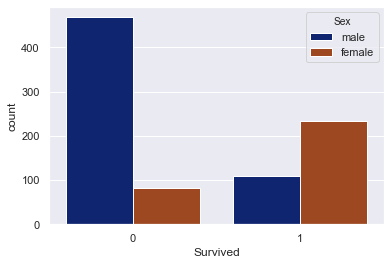

In [79]:
sns.countplot(x = dataset["Survived"] , hue = dataset["Sex"] , palette="dark")

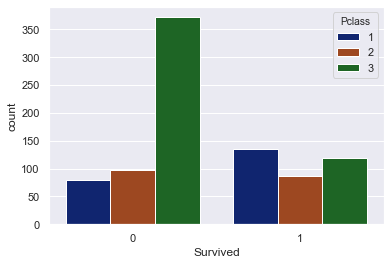

In [80]:
sns.countplot(x = dataset["Survived"] , hue = dataset["Pclass"] , palette="dark")

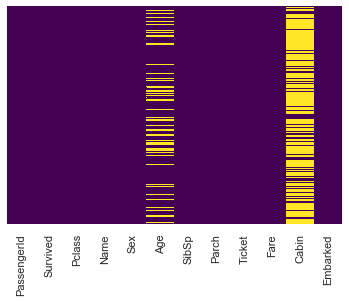

In [81]:
sns.heatmap(pd.isnull(dataset) , yticklabels=False , cbar=False , cmap='viridis')

In [82]:
dataset.drop('Cabin' , axis = 1 , inplace=True)

In [83]:
dataset

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Embarked  
0        0         A/5 21171   7.2500        S  
1        0          PC 17599  71.2833        C  
2        0  STON/O2. 3101282   7.9250        S  
3        0            113803  53.1000        S  
4        0            373450   8.0500        S  
..     ...               ...      ...      ...  
886      0            211536  13.0000        S  
887      0            112053  30.0000        S  
888      2        W./C. 6607  23.4500        S  
889      0            111369  30.0000        C  
890      0            370376   7.7500        Q  

[891 rows x 11 columns]

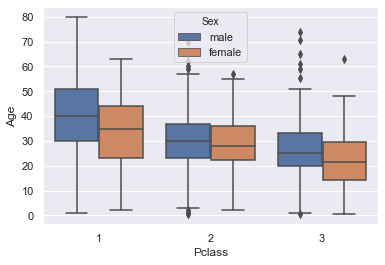

In [84]:
sns.boxplot(x= dataset['Pclass'], y = dataset['Age'] , hue = dataset['Sex'] )

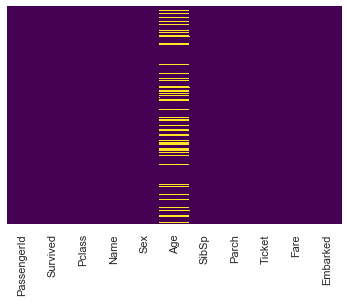

In [85]:
sns.heatmap(pd.isnull(dataset) , yticklabels=False , cbar=False , cmap='viridis')

In [86]:
def imput( cols ) :
    age = cols [0] 
    pclass = cols[1]
    sex = cols[2]
    if pd.isnull(age):
        if pclass == 1 :
            if sex == 'male' :
                return 40
            else :
                return 45
        elif pclass == 2 :
            if sex == 'male' :
                return 30
            else :
                return 28
        elif pclass == 3 :
            if sex == 'male' :
                return 25
            else :
                return 21
    else :
        return age

In [87]:
def imput1 (age , pclass, sex):
    if age == "NAN" :
        if pclass == 1 :
            if sex == 'male' :
                age = 40
            else :
                age = 45
        elif pclass == 2 :
            if sex == 'male' :
                age = 30
            else :
                age = 28
        elif pclass == 3 :
            if sex == 'male' :
                age = 25
            else :
                age = 21
    else :
        return age


In [88]:
dataset['Age'] = dataset[['Age', 'Pclass' , 'Sex']].apply(imput , axis=1)

In [89]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


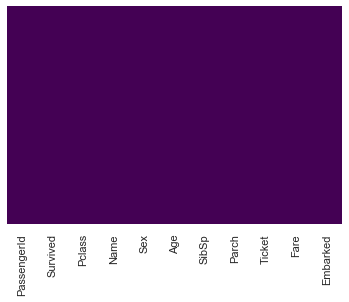

In [90]:
sns.heatmap(pd.isnull(dataset) , yticklabels=False , cbar=False , cmap='viridis')